In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
train_df=pd.read_excel('Data_Train.xlsx')

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Feature Engineering 

In [6]:
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]

In [7]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [8]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
dtype: object

In [9]:
train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [10]:
train_df=train_df.drop(['Date_of_Journey'],axis=1)

In [11]:
train_df['Arrival_Time']=train_df['Arrival_Time'].str.split(' ').str[0]

In [12]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [13]:
train_df['Total_Stops']=train_df['Total_Stops'].fillna('1 stop')

In [14]:
train_df['Total_Stops']=train_df['Total_Stops'].replace('non-stop','0 stop')

In [15]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [16]:
train_df['Stop'] = train_df['Total_Stops'].str.split(' ').str[0]

In [17]:
train_df['Stop']=train_df['Stop'].astype(int)
train_df=train_df.drop(['Total_Stops'],axis=1)

In [18]:
train_df['Arrival_Hour'] = train_df['Arrival_Time'] .str.split(':').str[0]
train_df['Arrival_Minute'] = train_df['Arrival_Time'] .str.split(':').str[1]

In [19]:
train_df['Arrival_Hour']=train_df['Arrival_Hour'].astype(int)
train_df['Arrival_Minute']=train_df['Arrival_Minute'].astype(int)
train_df=train_df.drop(['Arrival_Time'],axis=1)

In [20]:
train_df['Departure_Hour'] = train_df['Dep_Time'] .str.split(':').str[0]
train_df['Departure_Minute'] = train_df['Dep_Time'] .str.split(':').str[1]

In [21]:
train_df['Departure_Hour']=train_df['Departure_Hour'].astype(int)
train_df['Departure_Minute']=train_df['Departure_Minute'].astype(int)
train_df=train_df.drop(['Dep_Time'],axis=1)

In [22]:
train_df['Route_1']=train_df['Route'].str.split('→ ').str[0]
train_df['Route_2']=train_df['Route'].str.split('→ ').str[1]
train_df['Route_3']=train_df['Route'].str.split('→ ').str[2]
train_df['Route_4']=train_df['Route'].str.split('→ ').str[3]
train_df['Route_5']=train_df['Route'].str.split('→ ').str[4]

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [24]:
train_df['Price'].fillna((train_df['Price'].mean()),inplace=True)

In [25]:
train_df['Route_1'].fillna("None",inplace=True)
train_df['Route_2'].fillna("None",inplace=True)
train_df['Route_3'].fillna("None",inplace=True)
train_df['Route_4'].fillna("None",inplace=True)
train_df['Route_5'].fillna("None",inplace=True)

In [26]:
train_df=train_df.drop(['Route'],axis=1)
train_df=train_df.drop(['Duration'],axis=1)

In [27]:
train_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [28]:
train_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df["Airline"]=encoder.fit_transform(train_df['Airline'])
train_df["Source"]=encoder.fit_transform(train_df['Source'])
train_df["Destination"]=encoder.fit_transform(train_df['Destination'])
train_df["Additional_Info"]=encoder.fit_transform(train_df['Additional_Info'])
train_df["Route_1"]=encoder.fit_transform(train_df['Route_1'])
train_df["Route_2"]=encoder.fit_transform(train_df['Route_2'])
train_df["Route_3"]=encoder.fit_transform(train_df['Route_3'])
train_df["Route_4"]=encoder.fit_transform(train_df['Route_4'])
train_df["Route_5"]=encoder.fit_transform(train_df['Route_5'])

In [30]:
train_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4


## Test Data

In [31]:
test_df=pd.read_excel('Test_set.xlsx')

In [32]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [33]:
test_df['Date']=test_df['Date_of_Journey'].str.split('/').str[0]
test_df['Month']=test_df['Date_of_Journey'].str.split('/').str[1]
test_df['Year']=test_df['Date_of_Journey'].str.split('/').str[2]

In [34]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,05,2019
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,05,2019
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,06,2019


In [35]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Date               object
Month              object
Year               object
dtype: object

In [36]:
test_df['Date']=test_df['Date'].astype(int)
test_df['Month']=test_df['Month'].astype(int)
test_df['Year']=test_df['Year'].astype(int)

In [37]:
test_df=test_df.drop(['Date_of_Journey'],axis=1)

In [38]:
test_df['Arrival_Time']=test_df['Arrival_Time'].str.split(' ').str[0]

In [39]:
test_df[test_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year


In [40]:
test_df["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
test_df['Total_Stops']=test_df['Total_Stops'].replace('non-stop','0 stop')

In [42]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0 stop,No info,24,6,2019


In [43]:
test_df['Stop'] = test_df['Total_Stops'].str.split(' ').str[0]

In [44]:
test_df['Stop']=test_df['Stop'].astype(int)
test_df=test_df.drop(['Total_Stops'],axis=1)

In [45]:
test_df['Arrival_Hour'] = test_df['Arrival_Time'] .str.split(':').str[0]
test_df['Arrival_Minute'] = test_df['Arrival_Time'] .str.split(':').str[1]

In [46]:
test_df['Arrival_Hour']=test_df['Arrival_Hour'].astype(int)
test_df['Arrival_Minute']=test_df['Arrival_Minute'].astype(int)
test_df=test_df.drop(['Arrival_Time'],axis=1)

In [47]:
test_df['Departure_Hour'] = test_df['Dep_Time'] .str.split(':').str[0]
test_df['Departure_Minute'] = test_df['Dep_Time'] .str.split(':').str[1]

In [48]:
test_df['Departure_Hour']=test_df['Departure_Hour'].astype(int)
test_df['Departure_Minute']=test_df['Departure_Minute'].astype(int)
test_df=test_df.drop(['Dep_Time'],axis=1)

In [49]:
test_df['Route_1']=test_df['Route'].str.split('→ ').str[0]
test_df['Route_2']=test_df['Route'].str.split('→ ').str[1]
test_df['Route_3']=test_df['Route'].str.split('→ ').str[2]
test_df['Route_4']=test_df['Route'].str.split('→ ').str[3]
test_df['Route_5']=test_df['Route'].str.split('→ ').str[4]

In [50]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,No info,6,6,2019,1,4,25,17,30,DEL,BOM,COK,NaN,NaN
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,No info,12,5,2019,1,10,20,6,20,CCU,MAA,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,In-flight meal not included,21,5,2019,1,19,0,19,15,DEL,BOM,COK,NaN,NaN
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,No info,21,5,2019,1,21,0,8,0,DEL,BOM,COK,NaN,NaN
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,No info,24,6,2019,0,2,45,23,55,BLR,DEL,NaN,NaN,NaN


In [51]:
test_df['Route_1'].fillna("None",inplace=True)
test_df['Route_2'].fillna("None",inplace=True)
test_df['Route_3'].fillna("None",inplace=True)
test_df['Route_4'].fillna("None",inplace=True)
test_df['Route_5'].fillna("None",inplace=True)

In [52]:
test_df=test_df.drop(['Route'],axis=1)
test_df=test_df.drop(['Duration'],axis=1)

In [53]:
test_df.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,Jet Airways,Delhi,Cochin,No info,6,6,2019,1,4,25,17,30,DEL,BOM,COK,None,None
1,IndiGo,Kolkata,Banglore,No info,12,5,2019,1,10,20,6,20,CCU,MAA,BLR,None,None
2,Jet Airways,Delhi,Cochin,In-flight meal not included,21,5,2019,1,19,0,19,15,DEL,BOM,COK,None,None
3,Multiple carriers,Delhi,Cochin,No info,21,5,2019,1,21,0,8,0,DEL,BOM,COK,None,None
4,Air Asia,Banglore,Delhi,No info,24,6,2019,0,2,45,23,55,BLR,DEL,None,None,None


In [54]:
test_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
test_df["Airline"]=encoder.fit_transform(test_df['Airline'])
test_df["Source"]=encoder.fit_transform(test_df['Source'])
test_df["Destination"]=encoder.fit_transform(test_df['Destination'])
test_df["Additional_Info"]=encoder.fit_transform(test_df['Additional_Info'])
test_df["Route_1"]=encoder.fit_transform(test_df['Route_1'])
test_df["Route_2"]=encoder.fit_transform(test_df['Route_2'])
test_df["Route_3"]=encoder.fit_transform(test_df['Route_3'])
test_df["Route_4"]=encoder.fit_transform(test_df['Route_4'])
test_df["Route_5"]=encoder.fit_transform(test_df['Route_5'])

In [56]:
test_df.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,4,2,1,5,6,6,2019,1,4,25,17,30,3,7,5,8,3
1,3,3,0,5,12,5,2019,1,10,20,6,20,2,29,3,8,3
2,4,2,1,3,21,5,2019,1,19,0,19,15,3,7,5,8,3
3,6,2,1,5,21,5,2019,1,21,0,8,0,3,7,5,8,3
4,0,0,2,5,24,6,2019,0,2,45,23,55,0,13,21,8,3


## Feature Selection

In [57]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [58]:
df_train=train_df[:]
df_test=test_df[:]

In [59]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [62]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [63]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [64]:
selected_features=X_train.columns[(model.get_support())]

In [65]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [66]:
X_train=X_train.drop(['Year'],axis=1)

In [67]:
X_test=X_test.drop(['Year'],axis=1)

## RandomForestRegressor

In [68]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [71]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   5.2s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 32.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
y_pred=rf_random.predict(X_test)

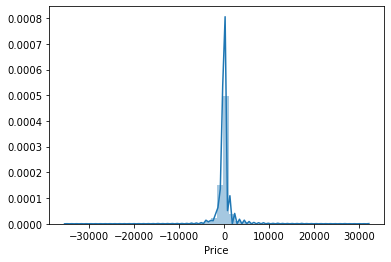

In [74]:
import seaborn as sns

sns.distplot(y_test-y_pred)

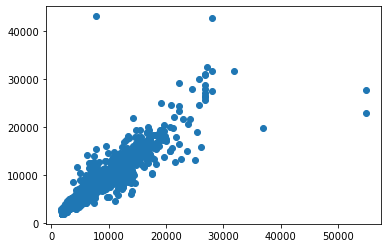

In [75]:
plt.scatter(y_test,y_pred)

In [76]:
from sklearn import metrics

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 680.8160300769528
MSE: 2610586.049996108
RMSE: 1615.730809880194


In [78]:
metrics.r2_score(y_test, y_pred)

0.8711232234700165

## Save the model to reuse it again

In [79]:
import pickle
# open a file, where you ant to store the data
file = open('Predction_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [80]:
model = open('Predction_rf.pkl','rb')
forest = pickle.load(model)

In [81]:
y_pred = forest.predict(X_test)

In [82]:
metrics.r2_score(y_test, y_pred)

0.8711232234700165